<a href="https://colab.research.google.com/github/choconutzy/Oceanography/blob/master/Oceanography_for_fisheries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
!pip install rasterio numpy pandas matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import rasterio

In [46]:
import rasterio

# Open the TIFF file
tiff_file = "/content/djf_2022.tif"
dataset = rasterio.open(tiff_file)

# Read the sea surface temperature data
sst_data = dataset.read(1)  # Assuming the temperature data is in the first band (band index 1)

# Calculate the mean, maximum, and minimum values
print(dataset)
sst_mean = sst_data.mean()
sst_max = sst_data.max()
sst_min = sst_data.min()

# Print the results
print("Mean SST:", sst_mean)
print("Max SST:", sst_max)
print("Min SST:", sst_min)

# Close the dataset
dataset.close()


<open DatasetReader name='/content/djf_2022.tif' mode='r'>
Mean SST: -inf
Max SST: 32.018333
Min SST: -3.402823e+38


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


In [15]:
import rasterio
import numpy as np

# Open the raster file
raster_file = "/content/djf_2022.tif"
dataset = rasterio.open(raster_file)

# Read the raster data
raster_data = dataset.read(1)  # Assuming the data is in the first band (band index 1)

# Get the geospatial transform and convert it to pixel coordinates
transform = dataset.transform
rows, cols = np.indices(raster_data.shape)
px, py = transform * (cols, rows)

# Convert pixel coordinates to geographic coordinates
gx, gy = dataset.xy(py.flatten(), px.flatten())

# Create points
points = [(x, y) for x, y in zip(gx, gy)]

# Print the first few points
for point in points[:10]:
    print(point)

# Close the dataset
dataset.close()


| 0.04, 0.00, 109.02|
| 0.00,-0.04,-7.78|
| 0.00, 0.00, 1.00|
(113.57290246287839, -7.4761933783711525)
(113.57463302328041, -7.4761933783711525)
(113.57636358368244, -7.4761933783711525)
(113.57809414408446, -7.4761933783711525)
(113.57982470448648, -7.4761933783711525)
(113.5815552648885, -7.4761933783711525)
(113.58328582529052, -7.4761933783711525)
(113.58501638569254, -7.4761933783711525)
(113.58674694609456, -7.4761933783711525)
(113.58847750649659, -7.4761933783711525)


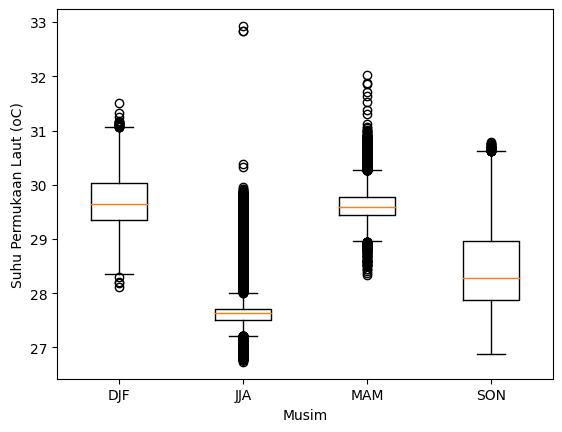

In [96]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import os

folder_path = "/content/sst/seasonal"

data = {
    "DJF": "",
    "JJA" : "",
    "MAM" : "",
    "SON" : "",
}
sst_data_seasonal = []

# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    
    # Check if the file is a regular file
    if os.path.isfile(file_path):
        # # Perform operations on the file
        # Open the SST TIFF file
        sst_tiff_file = file_path
        dataset = rasterio.open(sst_tiff_file)

        # Read the SST data
        sst_data = dataset.read(1)  # Assuming the temperature data is in the first band (band index 1)

        # Get the geospatial transform and convert it to pixel coordinates
        transform = dataset.transform
        rows, cols = np.indices(sst_data.shape)
        px, py = transform * (cols, rows)

        # Convert pixel coordinates to geographic coordinates
        gx, gy = dataset.xy(py.flatten(), px.flatten())

        # Create points with SST values
        sst_rtopoint = [[x,y,sst] for x, y, sst in zip(gx, gy, sst_data.flatten()) if sst>0]

        sst_rtopoint = pd.DataFrame(data= sst_rtopoint, columns=['x', 'y', 'sst'])
        fname = file_name.split('.')[0]
        sst_data_seasonal.append([fname, sst_rtopoint['sst'].max(), sst_rtopoint['sst'].min(), sst_rtopoint['sst'].mean()])
        data[fname] = sst_rtopoint['sst'].dropna()

result_sst_rtopoint = pd.DataFrame(data).dropna()
result_sst_rtopoint.to_csv(path_or_buf='/content/result/result_sst_rtopoint.csv')
summary_sst_rtopoint = pd.DataFrame(data=sst_data_seasonal, columns=['Musim', 'Maximum', 'Minimum', 'Rata-rata'])
summary_sst_rtopoint.to_csv(path_or_buf='/content/result/summary_sst_rtopoint.csv')
# Create a boxplot from the DataFrame
plt.boxplot(result_sst_rtopoint.values, labels=result_sst_rtopoint.columns)

# Set the plot title and axis labels
# plt.title("Boxplot Suhu Permukaan Laut")
plt.xlabel("Musim")
plt.ylabel("Suhu Permukaan Laut (oC)")

# Display the plot
plt.show()

# Close the dataset
dataset.close()


In [89]:
import pandas as pd
import rasterio

# Open the SST TIFF file
sst_tiff_file = "/content/djf_2022.tif"
dataset = rasterio.open(sst_tiff_file)

# Read the coordinate data from the CSV file
coordinate_file = "/content/djf_2022.csv"
coordinates = pd.read_csv(coordinate_file)

# Get the column names for x and y coordinates in the CSV file
x_column = "x"  # Replace with the actual column name for x-coordinate
y_column = "y"  # Replace with the actual column name for y-coordinate

# Create an empty list to store the SST values at the coordinates
sst_values = []
# Iterate over the coordinates and extract the corresponding SST values
for _, row in coordinates.iterrows():

    x = float(row[0].split(";")[3])
    y = float(row[0].split(";")[4])

    # Convert x, y coordinates to pixel coordinates
    px, py = dataset.index(x, y)

    # Read the SST value at the pixel coordinates
    sst_value = dataset.read(1, window=((py, py + 1), (px, px + 1)))

    # Append the SST value to the list
    sst_values.append(sst_value[0][0])

# Print the SST values
print(sst_values)

# Close the dataset
dataset.close()


[29.255, 29.69333, 29.664999, 29.381668, 28.501665, 29.01, 28.934998, 29.104998, 29.018333, 29.005, 29.005, 28.851667, 28.625, 28.934998, 29.005, 29.493332, 29.230001, 29.458334, 29.458334, 29.230001, 29.199999, 29.073334, 29.073334, 29.353333, 29.196665, 29.341667, 28.835001, 29.406668, 29.695, 29.118332, 29.01333, 29.01333, 29.01333, 29.01333]


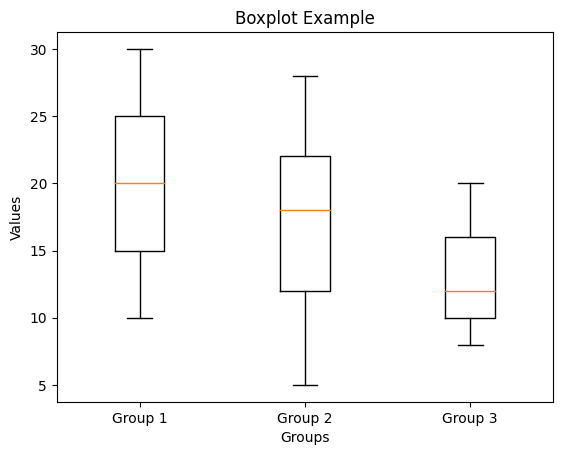

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame
data = {
    'Group 1': [10, 15, 20, 25, 30],
    'Group 2': [5, 12, 18, 22, 28],
    'Group 3': [8, 10, 12, 16, 20]
}
df = pd.DataFrame(data)

# Create a boxplot from the DataFrame
plt.boxplot(df.values, labels=df.columns)

# Set the plot title and axis labels
plt.title("Boxplot Example")
plt.xlabel("Groups")
plt.ylabel("Values")

# Display the plot
plt.show()
